- y에 대한 x의 조건부확률인 가능도를 계산하는 과정

In [6]:
rv_normal = sp.stats.norm(loc=37.5, scale=0.1)
rv_normal.pdf(37.8)

0.044318484119383855

In [8]:
rv_abnormal = sp.stats.norm(loc=40, scale=0.2)
rv_abnormal.pdf(39.9)

1.7603266338214911

# 이차판별분석법
- QDA

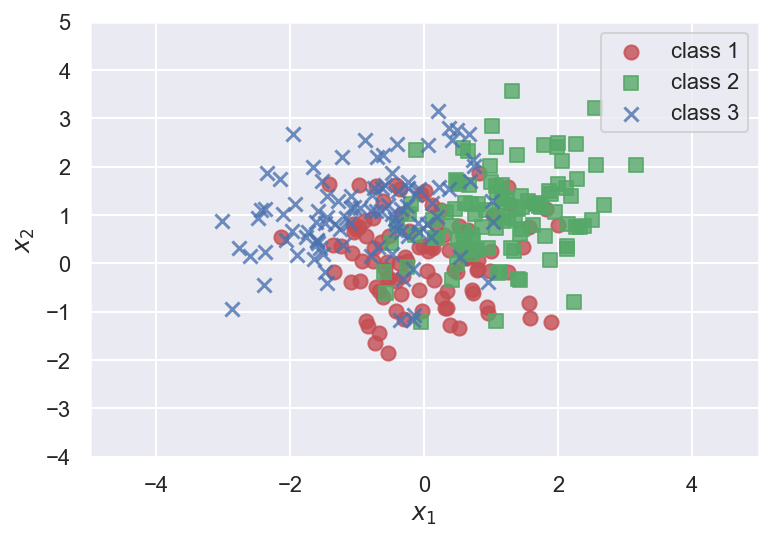

In [25]:
N = 100
rv1 = sp.stats.multivariate_normal([ 0, 0], [[0.7, 0.0], [0.0, 0.7]])
rv2 = sp.stats.multivariate_normal([ 1, 1], [[0.8, 0.2], [0.2, 0.8]])
rv3 = sp.stats.multivariate_normal([-1, 1], [[0.8, 0.2], [0.2, 0.8]])
np.random.seed(0)
X1 = rv1.rvs(N)
X2 = rv2.rvs(N)
X3 = rv3.rvs(N)
y1 = np.zeros(N)
y2 = np.ones(N)
y3 = 2 * np.ones(N)
X = np.vstack([X1, X2, X3])
y = np.hstack([y1, y2, y3])

plt.scatter(X1[:, 0], X1[:, 1], alpha=0.8, s=50, marker="o", color='r', label="class 1")
plt.scatter(X2[:, 0], X2[:, 1], alpha=0.8, s=50, marker="s", color='g', label="class 2")
plt.scatter(X3[:, 0], X3[:, 1], alpha=0.8, s=50, marker="x", color='b', label="class 3")
plt.xlim(-5, 5)
plt.ylim(-4, 5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.show()

In [26]:
# 아래에 나올 qda.means_와 같음
X1.mean(axis=0), X2.mean(axis=0), X3.mean(axis=0)

(array([-0.00080125,  0.1194572 ]),
 array([1.16303727, 1.03930605]),
 array([-0.8640604 ,  1.02295794]))

In [27]:
# qda.covariane_와 같음
np.cov(X1.T), np.cov(X2.T), np.cov(X3.T)

(array([[ 0.73846319, -0.01762041],
        [-0.01762041,  0.72961278]]),
 array([[0.66534246, 0.21132313],
        [0.21132313, 0.78806006]]),
 array([[0.9351386 , 0.22880955],
        [0.22880955, 0.79142383]]))

In [29]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis(store_covariance=True).fit(X,y)

- priors_: 각 클래스 k의 사전확률.

- 가능도 구하는 때 필요한 모수
    - means_: 각 클래스 k에서 x의 기댓값 벡터 μk의 추정치 벡터.

    - covariance_: 각 클래스 k에서 x의 공분산 행렬 Σk의 추정치 행렬. (생성자 인수 store_covariance 값이 True인 경우에만 제공)


In [30]:
qda.priors_

array([0.33333333, 0.33333333, 0.33333333])

In [31]:
qda.means_

array([[-8.01254084e-04,  1.19457204e-01],
       [ 1.16303727e+00,  1.03930605e+00],
       [-8.64060404e-01,  1.02295794e+00]])

In [32]:
qda.covariance_

[array([[ 0.73846319, -0.01762041],
        [-0.01762041,  0.72961278]]),
 array([[0.66534246, 0.21132313],
        [0.21132313, 0.78806006]]),
 array([[0.9351386 , 0.22880955],
        [0.22880955, 0.79142383]])]

In [40]:
# example
# 각 클래스의 분포에서 x1=2, x2=-1일 확률
rv1 = sp.stats.multivariate_normal(X1.mean(axis=0), np.cov(X1.T))
rv2 = sp.stats.multivariate_normal(X2.mean(axis=0), np.cov(X2.T))
rv3 = sp.stats.multivariate_normal(X3.mean(axis=0), np.cov(X3.T))

In [41]:
rv1.pdf([2,-1]),rv2.pdf([2,-1]), rv3.pdf([2,-1])

(0.0065621236568562755, 0.0034060346804690644, 1.5412251295786176e-05)

- 파란색(클래스3) 점이 (2,-1)에 나올 확률이 매우 낮음

## 연습문제

In [135]:
from sklearn.datasets import load_iris
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')
X.columns = ['sl','sw','pl','pw']

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis(store_covariance=True).fit(X,y)

In [65]:
X1 = X[y == 0]
X2 = X[y == 1]
X3 = X[y == 2]

In [70]:
np.array([X1.mean(axis=0).values, X2.mean(axis=0).values, X3.mean(axis=0).values])

array([[5.006, 3.428, 1.462, 0.246],
       [5.936, 2.77 , 4.26 , 1.326],
       [6.588, 2.974, 5.552, 2.026]])

In [75]:
np.cov(X1.T), np.cov(X2.T), np.cov(X3.T)

(array([[0.12424898, 0.09921633, 0.0163551 , 0.01033061],
        [0.09921633, 0.1436898 , 0.01169796, 0.00929796],
        [0.0163551 , 0.01169796, 0.03015918, 0.00606939],
        [0.01033061, 0.00929796, 0.00606939, 0.01110612]]),
 array([[0.26643265, 0.08518367, 0.18289796, 0.05577959],
        [0.08518367, 0.09846939, 0.08265306, 0.04120408],
        [0.18289796, 0.08265306, 0.22081633, 0.07310204],
        [0.05577959, 0.04120408, 0.07310204, 0.03910612]]),
 array([[0.40434286, 0.09376327, 0.3032898 , 0.04909388],
        [0.09376327, 0.10400408, 0.07137959, 0.04762857],
        [0.3032898 , 0.07137959, 0.30458776, 0.04882449],
        [0.04909388, 0.04762857, 0.04882449, 0.07543265]]))

In [43]:
qda.priors_

array([0.33333333, 0.33333333, 0.33333333])

In [46]:
qda.means_

array([[5.006, 3.428, 1.462, 0.246],
       [5.936, 2.77 , 4.26 , 1.326],
       [6.588, 2.974, 5.552, 2.026]])

In [53]:
qda.covariance_[0]

array([[0.12424898, 0.09921633, 0.0163551 , 0.01033061],
       [0.09921633, 0.1436898 , 0.01169796, 0.00929796],
       [0.0163551 , 0.01169796, 0.03015918, 0.00606939],
       [0.01033061, 0.00929796, 0.00606939, 0.01110612]])

In [54]:
qda.covariance_[1]

array([[0.26643265, 0.08518367, 0.18289796, 0.05577959],
       [0.08518367, 0.09846939, 0.08265306, 0.04120408],
       [0.18289796, 0.08265306, 0.22081633, 0.07310204],
       [0.05577959, 0.04120408, 0.07310204, 0.03910612]])

In [55]:
qda.covariance_[2]

array([[0.40434286, 0.09376327, 0.3032898 , 0.04909388],
       [0.09376327, 0.10400408, 0.07137959, 0.04762857],
       [0.3032898 , 0.07137959, 0.30458776, 0.04882449],
       [0.04909388, 0.04762857, 0.04882449, 0.07543265]])

In [103]:
y_hat=  qda.predict(X)

In [115]:
decision_function_0 = qda.predict_proba(X)[:,0]
decision_function_1 = qda.predict_proba(X)[:,1]
decision_function_2 = qda.predict_proba(X)[:,2]
decision_function = [decision_function_0,decision_function_1,decision_function_2]

In [100]:
result_0 = pd.DataFrame([decision_function_0, y, qda.predict(X)]).T
result_1 = pd.DataFrame([decision_function_1, y, qda.predict(X)]).T
result_2 = pd.DataFrame([decision_function_2, y, qda.predict(X)]).T

In [102]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

In [104]:
confusion_matrix(y, y_hat)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]], dtype=int64)

In [114]:
print(classification_report(y, y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.96      0.97        50
           2       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



C:\Users\Hobin\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass classes=[0, 1, 2] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


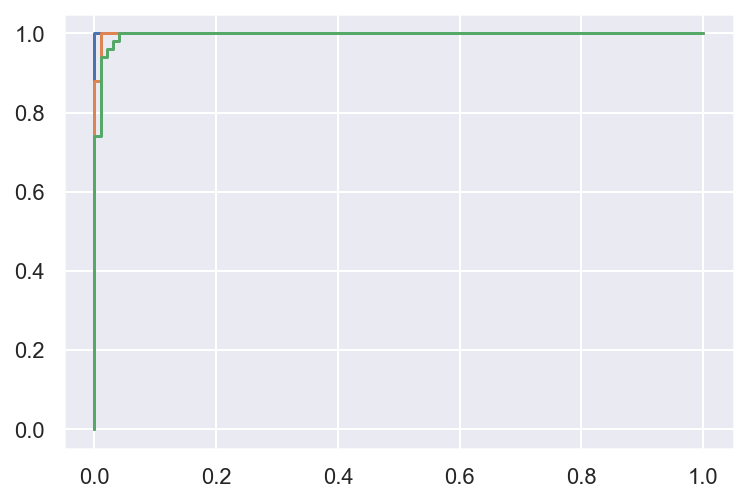

In [137]:
from sklearn.preprocessing import label_binarize

y = label_binarize(iris.target, [0, 1, 2])

fpr = [None] * 3
tpr = [None] * 3
thr = [None] * 3

for i in range(3):
    model = QuadraticDiscriminantAnalysis(store_covariance=True).fit(X, y[:, i])
    fpr[i], tpr[i], thr[i] = roc_curve(y[:, i], model.predict_proba(X)[:, 1])
    plt.plot(fpr[i], tpr[i])

plt.show()